In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Read in an image

In [2]:
im = plt.imread('../../Data/bird.png')

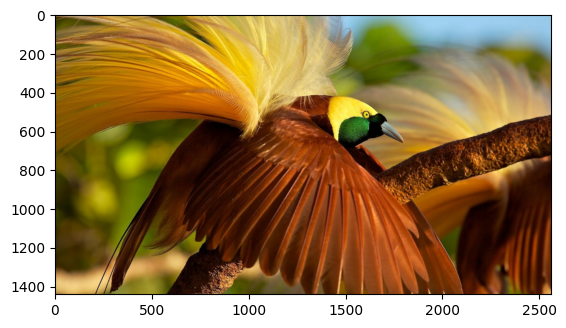

In [3]:
plt.imshow(im)

In [4]:
im.shape

(1440, 2560, 4)

In [5]:
# Remove 4th channel as not needed
im2 = im[:,:,:3]
im2.shape

(1440, 2560, 3)

### See colour layers

In [6]:
# Split the colours up into separate channels
R = im2[:,:,0]
G = im2[:,:,1]
B = im2[:,:,2]

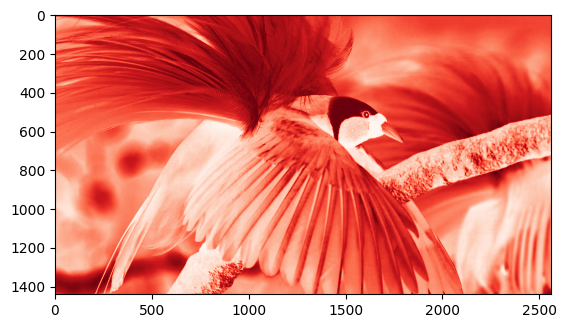

In [7]:
plt.imshow(R, cmap='Reds')

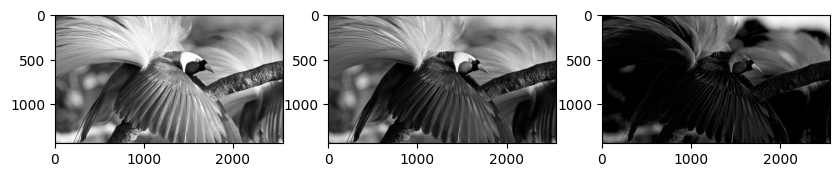

In [8]:
# See each channel
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,15))
ax1.imshow(R, cmap='gray')
ax2.imshow(G, cmap='gray')
ax3.imshow(B, cmap='gray')

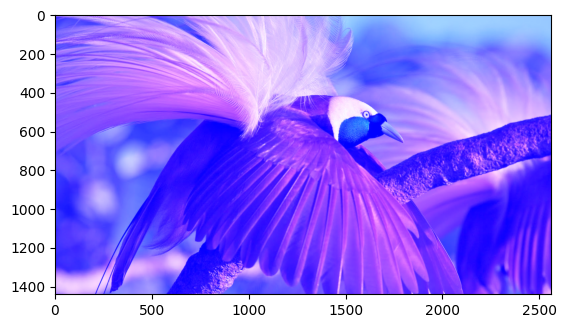

In [9]:
# increase the blue channel to max
im3 = im2.copy()
im3[:,:,2] = 1
plt.imshow(im3)

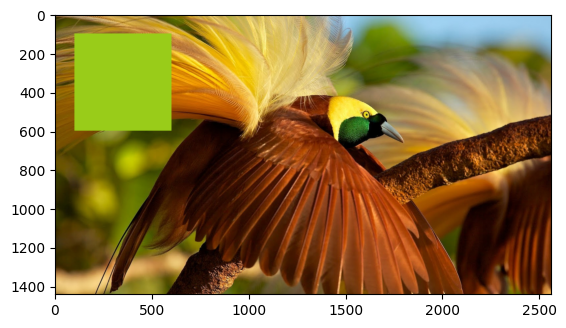

In [10]:
#  Change channels in a section (this image requires 0 to 1 instead of 0 to 255)
im4 = im2.copy()
im4[100:600, 100:600, 0] = 0.6
im4[100:600, 100:600, 1] = 0.8
im4[100:600, 100:600, 2] = 0.1
plt.imshow(im4)

### Convert to grayscale

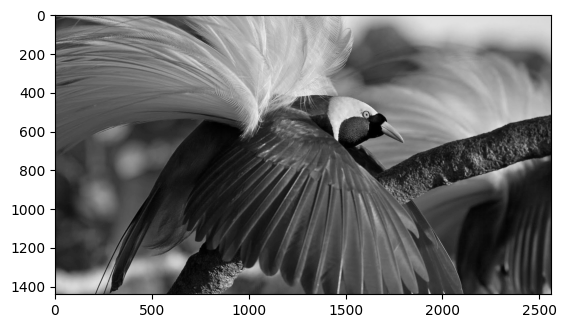

In [11]:
# Try averaging all of the colors
im_gray_1 = 0.333*R + 0.333*G + 0.333*B
plt.imshow(im_gray_1, cmap='gray')

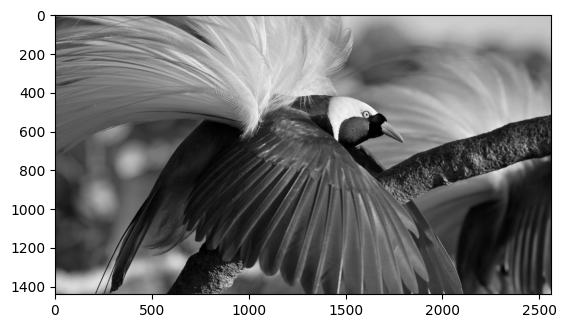

In [12]:
# Better weightings have been found to be (and are often used)
im_gray_2 = 0.2989*R + 0.5870*G + 0.1140*B
plt.imshow(im_gray_2, cmap='gray')

In [13]:
import cv2

In [14]:
im_gray_cv2 = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

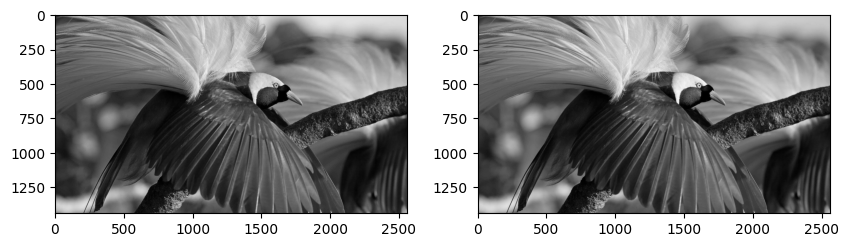

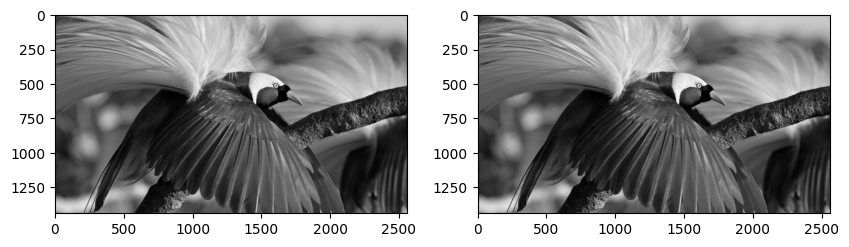

In [15]:
# Compare this greyscale to cv2s (it is slightly diffent)
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
ax1.imshow(im_gray_1, cmap='gray')
ax2.imshow(im_gray_cv2, cmap='gray')

# Compare this greyscale to cv2s (it is the same)
fig,(ax3, ax4) = plt.subplots(1, 2, figsize=(10,15))
ax3.imshow(im_gray_2, cmap='gray')
ax4.imshow(im_gray_cv2, cmap='gray')

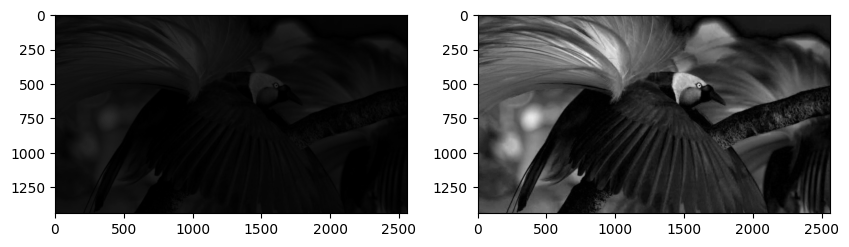

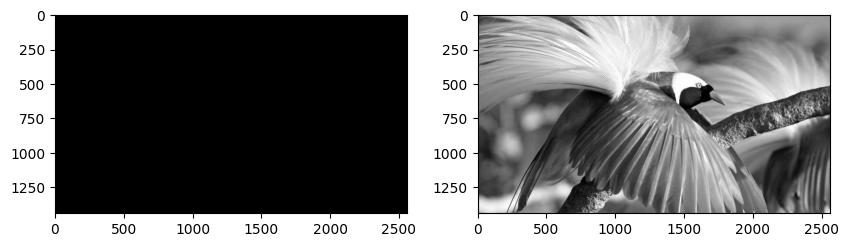

In [16]:
# Showing differnces between the images
# Without limiting it can show very small differnces
im_diff_1 = abs(im_gray_1 - im_gray_cv2)
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
ax1.imshow(im_diff_1, cmap='gray', vmin=0, vmax=1)
ax2.imshow(im_diff_1, cmap='gray')

# Fewer difference on this one
im_diff_2 = abs(im_gray_2 - im_gray_cv2)
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
ax1.imshow(im_diff_2, cmap='gray', vmin=0, vmax=1)
ax2.imshow(im_diff_2, cmap='gray')

### Convolutions / filters

#### Image bluring

In [17]:
from scipy import signal

In [18]:
# Use a grayscale image
im_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

[Text(0.5, 1.0, 'Blurred')]

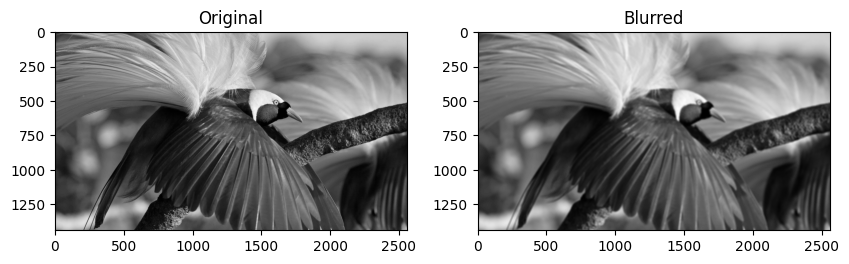

In [19]:
# Make the bluring mask
mask_size = (15,15)
mask_squares = mask_size[0]*mask_size[1]
smoothing_mask = np.ones(mask_size)/mask_squares

# Boundary can be zero padded or use symmetric reflectance
# Should the resultant size be the same or different
im_blurred = signal.convolve2d(im_gray, smoothing_mask,
                               boundary='symm', mode='same')

# Display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(im_gray, cmap='gray')
ax2.imshow(im_blurred, cmap='gray')
ax1.set(title='Original')
ax2.set(title='Blurred')

#### Edge detection

In [20]:
# Create a mask to detect x edges
x_mask = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
# Create a mask to deetect y edges
y_mask = x_mask.T.copy()

# Create images showing edges for x and y
x_edge = signal.convolve2d(im_gray, x_mask, boundary='symm', mode='same')
y_edge = signal.convolve2d(im_gray, y_mask, boundary='symm', mode='same')

# All shapes are the same
im_gray.shape, x_edge.shape, y_edge.shape

((1440, 2560), (1440, 2560), (1440, 2560))

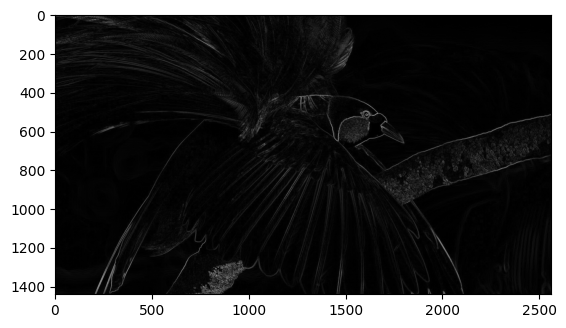

In [21]:
# Define the gradient magnitude (using Pythag)
grad_mag = (x_edge**2 + y_edge**2)**0.5
plt.imshow(grad_mag, cmap='gray')

threshold=0.4085440077320568


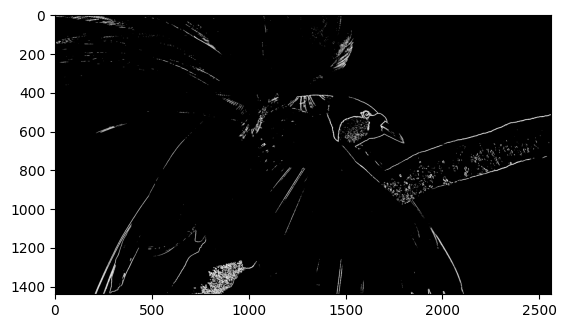

In [22]:
# Calcualte the threshold for the value
# Can adjust threshold with the integer base (tried 2 then 4)
threshold = grad_mag.max() - 15*grad_mag.std()
print(f'{threshold=}')

# Calculate the edge image (whenever the gradient magnitude is greater than the threshold)
edge_image = grad_mag > threshold

plt.imshow(edge_image, cmap='gray')
# Threshold was too high, so decrease it with standard deviation increase

#### Image sharpening

[Text(0.5, 1.0, 'Sharpened')]

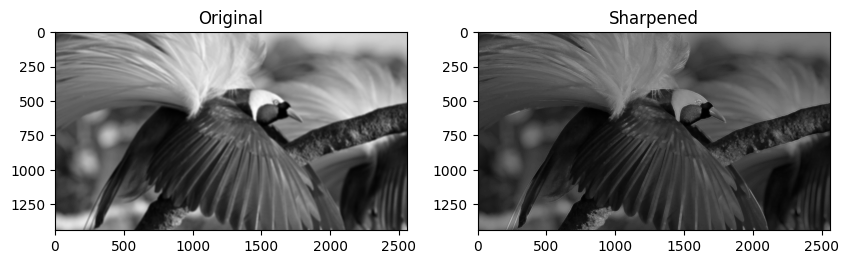

In [23]:
# Can sharpen an image by multiplying it by the gradient magnitude
im_sharped = im_blurred + 0.5*grad_mag

#  Plot the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
ax1.imshow(im_blurred, cmap='gray')
ax2.imshow(im_sharped, cmap='gray')
ax1.set(title='Original')
ax2.set(title='Sharpened')